In [1]:
#知识点
#1.一元线性回归模型
#2.绘图观察相关性
#3.删除含缺失值行


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [3]:
df_new=pd.read_excel("D:/2022_py_code/chap2数据/03_newDate.xlsx",sheet_name="Sheet1",index_col=0)

#一元线性回归

In [4]:
#将字符型日期格式转换为日期格式，并重置索引
df_new.index=pd.to_datetime(df_new.date,format="%Y/%m/%d")
new_time=pd.date_range('2011-1-1','2020-12-31')
#生成2011年1月1日——2020年12月31日的日期

In [5]:
#使用完整的日期重置原始数据的索引，这是为了不全日期缺失值
df_date_new=df_new.reindex(new_time)
#reindex()是pandas对象的一个重要方法，其作用是创建一个新索引的新对象。

In [6]:
df_date_new.to_excel("D:/2022_py_code/chap2数据/05_missDate.xlsx")

In [7]:
df=df_date_new.reset_index()
#数据清洗时，会将带空值的行删除，此时DataFrame或Series类型的数据不再是连续的索引
#可以使用reset_index()重置索引。
#比如本来数据是1 3 5 6 7行，现在会变成0 1 2 3 4 行
#在获得新的index，原来的index变成数据列，保留下来。
#不想保留原来的index，使用参数 drop=True，默认 False。

In [8]:
df1=df_date_new.loc["2011-01-02":"2020-12-31","maxTem"]
#截取次日最高气温数据，作为预测的气温数据
#注意这是从一月二号开始的，生成2011年1月2日——2020年12月31日的日期
#取2011年到2022年的数据，maxTem所有行，
#多取几列格式为 data.loc[:,['A','B']]


In [9]:
df2=df1.reset_index()#重置索引

In [10]:
df['maxPre']=df2['maxTem']#将次日最高气温（预测气温）整合到原数据框

In [14]:
df.to_excel("D:/2022_py_code/chap2数据/06_preDate.xlsx")

FileCreateError: [Errno 13] Permission denied: 'D:/2022_py_code/chap2数据/06_preDate.xlsx'

In [15]:
#数据中缺失值较多，仍然需要处理
df_pre=pd.read_excel("D:/2022_py_code/chap2数据/06_preDate.xlsx")

In [16]:
df_pre.index=df_pre['index']#改一下索引

In [17]:
df0=df_pre[['maxTem','maxPre']]#截取后续用到的“maxTem”列和“maxPre"列

In [18]:
df=df0.dropna()
#删除缺失值

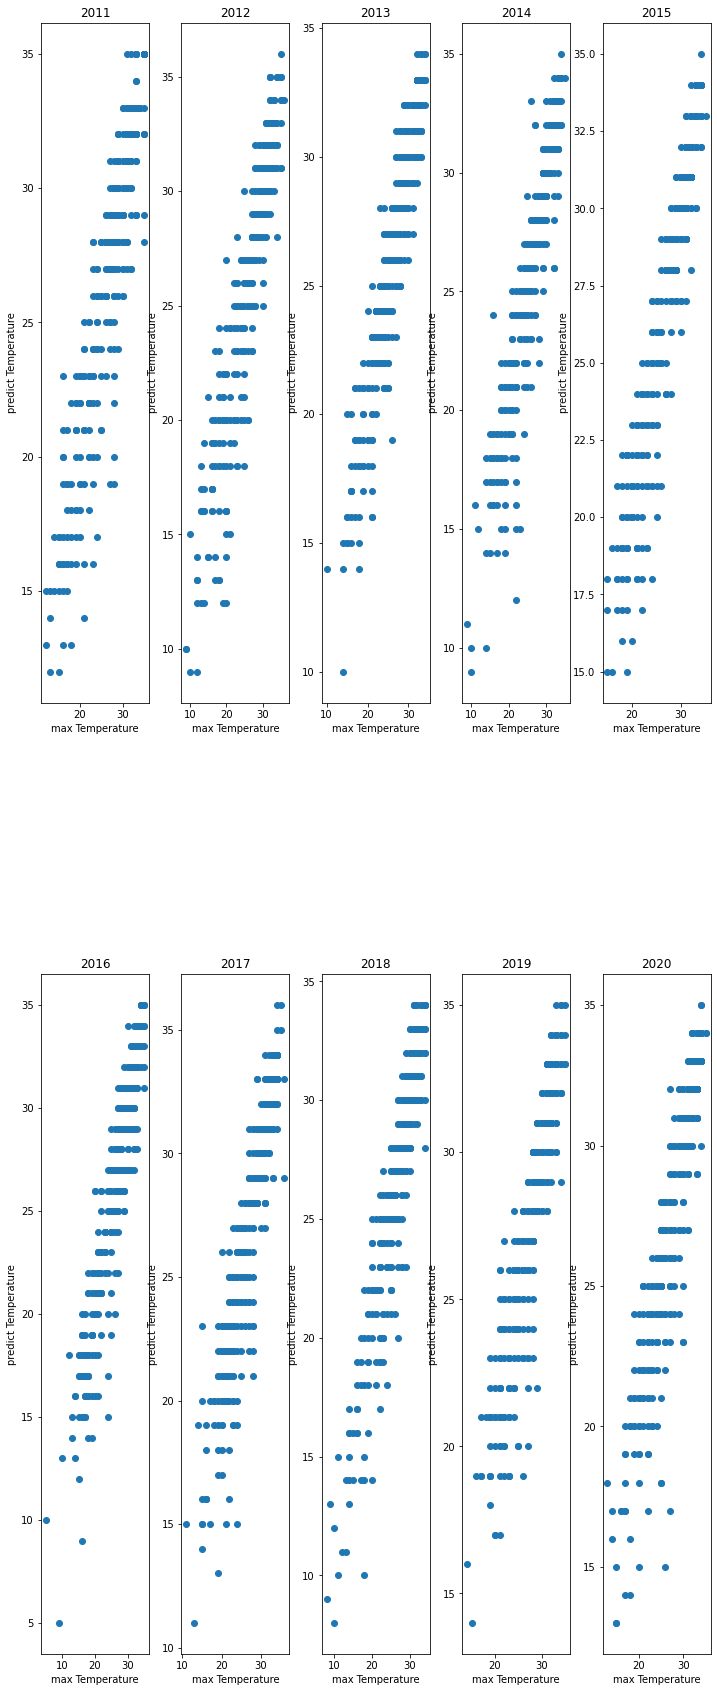

In [19]:
fig=plt.figure(figsize=(12,30))
j=1
year=range(2011,2021)#生成2011-2020年的连续整数
for i in year:
    plt.subplot(2,5,j)#4行3列，位置为j
    df[str(i)]
    plt.plot(df[str(i)].maxTem,df[str(i)].maxPre,'o')#分别绘制每年的数据
    plt.xlabel('max Temperature')
    plt.ylabel('predict Temperature')
    plt.title(str(i))
    j=j+1
plt.subplots_adjust(wspace=0.3,hspace=0.4)
plt.show()

#当日最高气温为x，次日最高气温为y
#经过观察，maxTem和maxPre两列的数据存在一定的相关性

In [20]:
print(df.head(10))

            maxTem  maxPre
index                     
2011-01-01    20.0    22.0
2011-01-02    22.0    22.0
2011-01-03    22.0    23.0
2011-01-04    23.0    19.0
2011-01-05    19.0    16.0
2011-01-06    16.0    19.0
2011-01-07    19.0    20.0
2011-01-08    20.0    18.0
2011-01-09    18.0    13.0
2011-01-10    13.0    14.0


In [31]:
#生成训练数据集和测试数据集
df_train=df["2011-01-01":"2018-12-31"].dropna()
#将2011——2018的数据作为训练集，并去除缺失值
df_test=df["2019-01-01":"2020-12-31"].dropna()
#将2019——2020的数据作为测试数据、并删除含缺失值的行

In [32]:
X_train=df_train[['maxTem']]
Y_train=df_train[['maxPre']]

In [33]:
X_test=df_test[['maxTem']]
Y_test=df_test[['maxPre']]

In [34]:
#模型训练
slr=LinearRegression()
slr.fit(X_train,Y_train)

LinearRegression()

In [35]:
print("The linear model is:y={:.5}+{:.5}x".format(slr.intercept_[0],slr.coef_[0][0]))
#intercept_  是截距项，coef_  是估计系数 

The linear model is:y=1.766+0.93376x


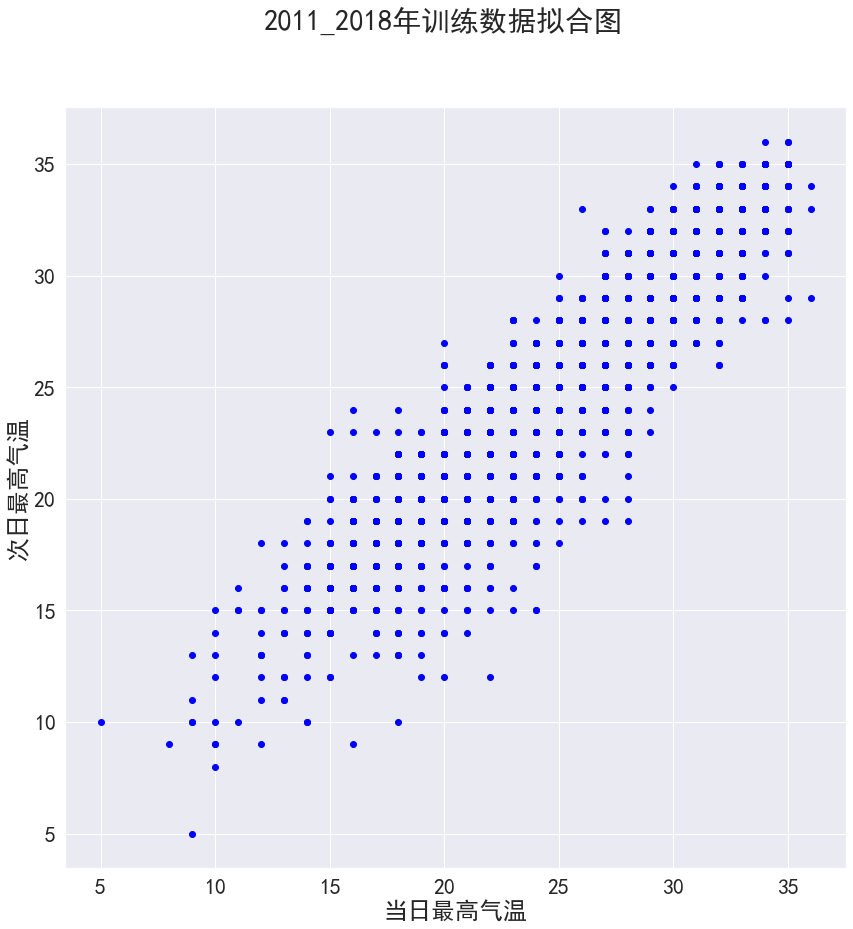

In [36]:
#绘制散点图和你和直线
sns.set(font_scale=2,font='SimHei')
fig=plt.figure(figsize=(14,14))
fig.suptitle('2011_2018年训练数据拟合图')
plt.scatter(X_train,Y_train,c='blue')#scatter用于绘制散点图
plt.xlabel("当日最高气温")
plt.ylabel("次日最高气温")
plt.show()

In [37]:
#在训练集上评估
formula="maxPre~maxTem"
lm_train=smf.ols(formula,df_train).fit()
print(lm_train.summary())

                            OLS Regression Results                            
Dep. Variable:                 maxPre   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                 1.970e+04
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:19:53   Log-Likelihood:                -6093.8
No. Observations:                2904   AIC:                         1.219e+04
Df Residuals:                    2902   BIC:                         1.220e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7660      0.181      9.751      0.0

In [38]:
#在测试集上评估
formula="maxPre~maxTem"
df_test=df["2019-01-01":"2020-12-31"].dropna()

lm_test=smf.ols(formula,df_test).fit()
print(lm_test.summary())

                            OLS Regression Results                            
Dep. Variable:                 maxPre   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     3664.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.52e-286
Time:                        23:19:54   Log-Likelihood:                -1507.0
No. Observations:                 730   AIC:                             3018.
Df Residuals:                     728   BIC:                             3027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3249      0.419      5.544      0.0

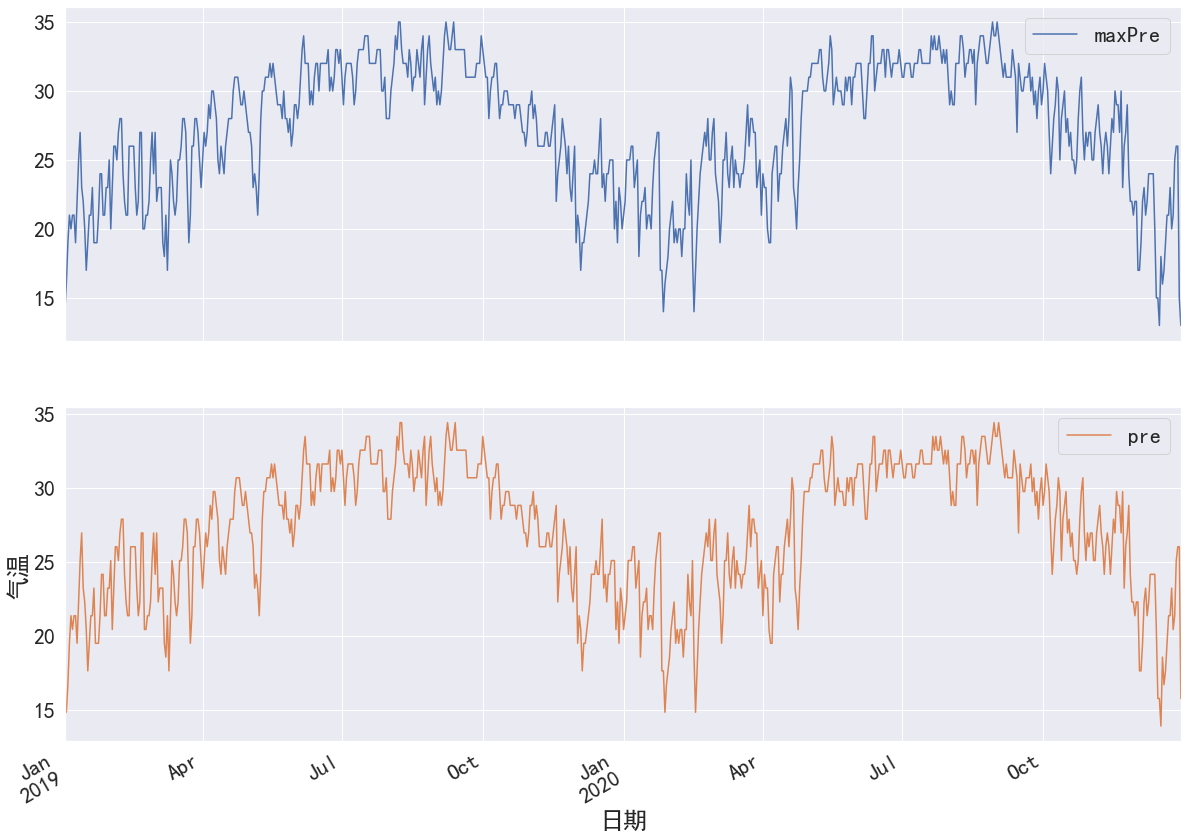

In [39]:
#将测试数据带入模型进行预测，并且可视化
pre_X_test=slr.predict(X_test)#利用测试集预测气温
Y_test['pre']=pre_X_test#将利用测试集预测的气温合并到测试集的Y值，方便后续作图
Y_test.plot(subplots=True,figsize=(20,15))#subplots表示将两个子图分开
plt.legend(loc='best')#对数据框相同的索引分列分别作图
plt.xlabel('日期')
plt.ylabel('气温')
plt.show()